In [1]:
import yfinance as yf

In [2]:
apple = yf.Ticker("AAPL")

In [3]:
apple.info


{'address1': 'One Apple Park Way',
 'city': 'Cupertino',
 'state': 'CA',
 'zip': '95014',
 'country': 'United States',
 'phone': '408 996 1010',
 'website': 'https://www.apple.com',
 'industry': 'Consumer Electronics',
 'industryKey': 'consumer-electronics',
 'industryDisp': 'Consumer Electronics',
 'sector': 'Technology',
 'sectorKey': 'technology',
 'sectorDisp': 'Technology',
 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, and HomePod. It also provides AppleCare support and cloud services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and pod

In [4]:
apple = apple.history(period="max")

<Axes: xlabel='Date'>

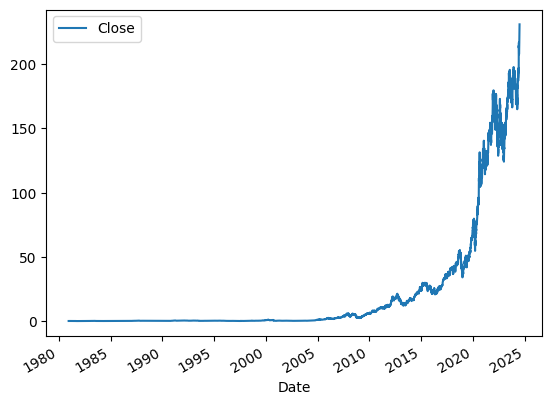

In [5]:
apple.plot.line(y="Close", use_index=True)

In [6]:
del apple["Dividends"]
del apple["Stock Splits"]

In [7]:
apple["Tomorrow"] = apple["Close"].shift(-1)

In [8]:
apple.head()

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1980-12-12 00:00:00-05:00,0.099058,0.099488,0.099058,0.099058,469033600,0.093890
1980-12-15 00:00:00-05:00,0.094320,0.094320,0.093890,0.093890,175884800,0.086999
1980-12-16 00:00:00-05:00,0.087429,0.087429,0.086999,0.086999,105728000,0.089152
1980-12-17 00:00:00-05:00,0.089152,0.089582,0.089152,0.089152,86441600,0.091737
1980-12-18 00:00:00-05:00,0.091737,0.092167,0.091737,0.091737,73449600,0.097335


In [9]:
apple["Target"] = (apple["Tomorrow"] > apple["Close"]).astype(int)

In [10]:
apple.head()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099058,0.099488,0.099058,0.099058,469033600,0.093890,0
1980-12-15 00:00:00-05:00,0.094320,0.094320,0.093890,0.093890,175884800,0.086999,0
1980-12-16 00:00:00-05:00,0.087429,0.087429,0.086999,0.086999,105728000,0.089152,1
1980-12-17 00:00:00-05:00,0.089152,0.089582,0.089152,0.089152,86441600,0.091737,1
1980-12-18 00:00:00-05:00,0.091737,0.092167,0.091737,0.091737,73449600,0.097335,1


In [11]:
apple = apple.loc["2005-01-01":].copy()

In [12]:
apple.head()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
2005-01-03 00:00:00-05:00,0.978008,0.982990,0.945095,0.955513,691992000,0.965326,1
2005-01-04 00:00:00-05:00,0.963061,0.988425,0.950681,0.965326,1096810400,0.973781,1
2005-01-05 00:00:00-05:00,0.973176,0.985104,0.966986,0.973781,680433600,0.974535,1
2005-01-06 00:00:00-05:00,0.976346,0.979970,0.956116,0.974535,705555200,1.045492,1
2005-01-07 00:00:00-05:00,0.981329,1.051230,0.977554,1.045492,2227450400,1.041115,0


In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100,random_state=1)

train = apple.iloc[:-100]
test = apple.iloc[-100:]

predictors = ["Close", "Volume", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [14]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [15]:
import pandas as pd
preds = pd.Series(preds, index = test.index)

In [16]:
precision_score(test["Target"], preds)

0.5227272727272727

<Axes: xlabel='Date'>

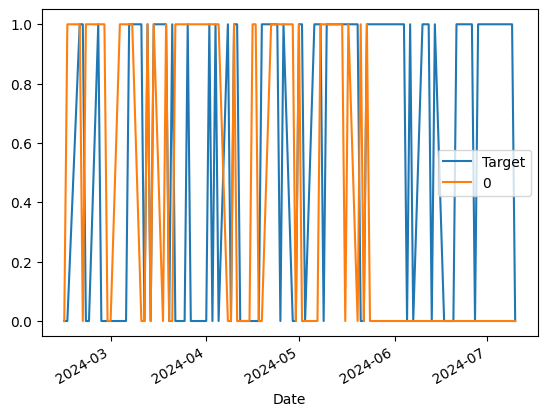

In [17]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()